In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
attrdata = pd.read_csv('/content/attrition-dataset.csv')

In [3]:
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Mashhad,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


Data Exploration

In [4]:
attrdata.drop(0,inplace=True)
attrdata.isnull().sum()

,0
table id,0
name,0
phone number,0
Location,0
Emp. Group,0
Function,0
Gender,0
Tenure,0
Tenure Grp.,0
Experience (YY.MM),4


In [5]:
attrdata.dropna(axis=0, inplace=True)

In [6]:
attrdata.isnull().sum()

,0
table id,0
name,0
phone number,0
Location,0
Emp. Group,0
Function,0
Gender,0
Tenure,0
Tenure Grp.,0
Experience (YY.MM),0


In [7]:
attrdata.shape

(895, 16)

In [8]:
gender = attrdata["Gender "].value_counts()
gender

,count
Gender,
Male,655
Female,234
other,6


<Axes: xlabel='Gender '>

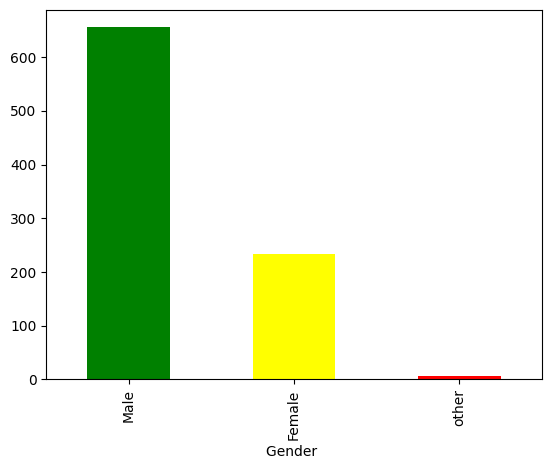

In [9]:
attrdata['Gender '].value_counts().plot(kind='bar', color=['green',  'yellow',  'red'])

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'other')])

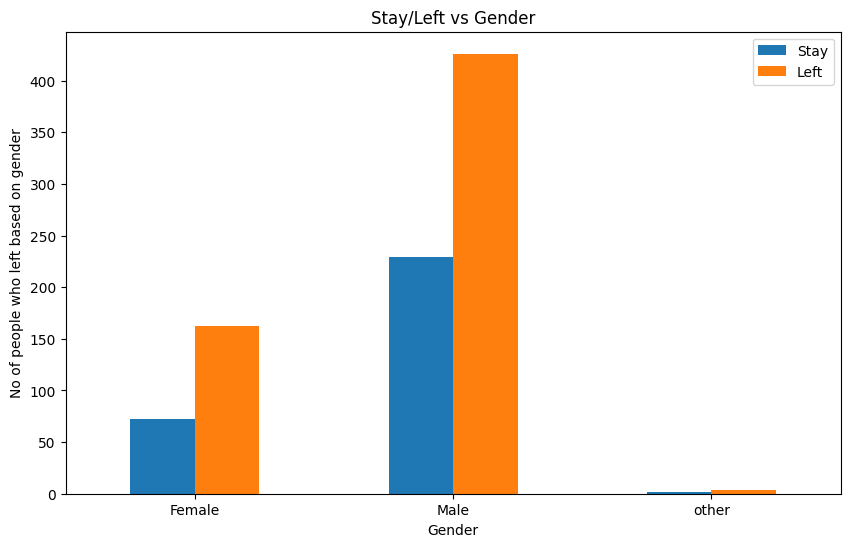

In [10]:
pd.crosstab(attrdata['Gender '], attrdata['Stay/Left']).plot(kind='bar', figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Gender")
plt.ylabel("No of people who left based on gender")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)


In [11]:
promoted = attrdata["Promoted/Non Promoted"].value_counts()
promoted

,count
Promoted/Non Promoted,
Promoted,457
Non Promoted,438


<Axes: xlabel='Promoted/Non Promoted'>

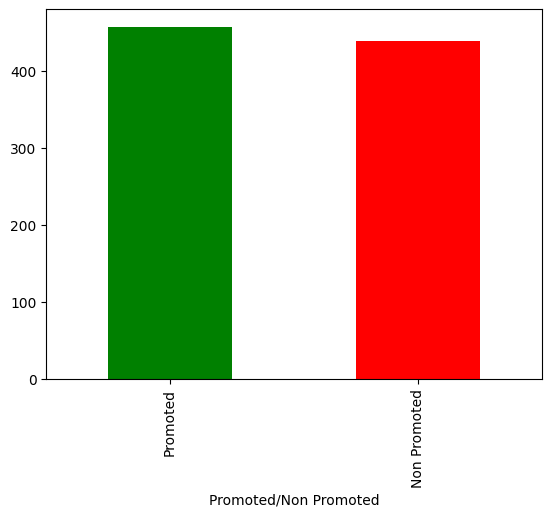

In [12]:
attrdata['Promoted/Non Promoted'].value_counts().plot(kind='bar', color=['green',  'red'])

(array([0, 1]), [Text(0, 0, 'Non Promoted'), Text(1, 0, 'Promoted')])

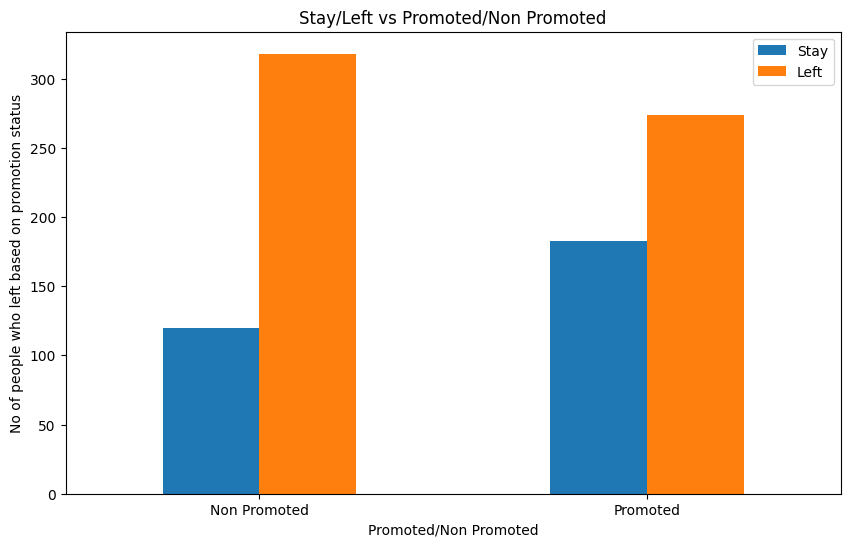

In [13]:
pd.crosstab(attrdata['Promoted/Non Promoted'], attrdata['Stay/Left']).plot(kind='bar', figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Promoted/Non Promoted")
plt.ylabel("No of people who left based on promotion status")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)

In [14]:
functions = attrdata['Function'].value_counts()
functions

,count
Function,
Operation,831
Support,52
Sales,12


<Axes: xlabel='Function'>

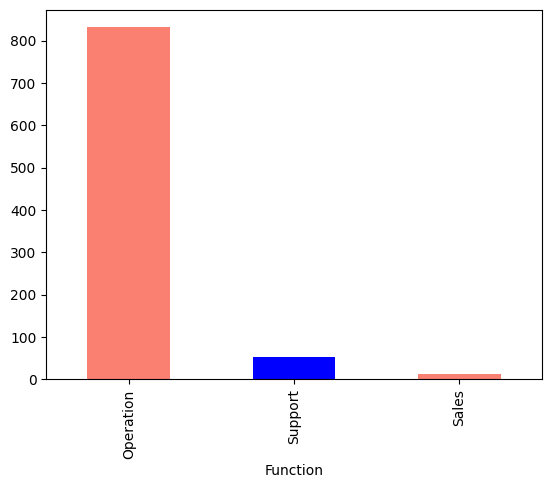

In [15]:
attrdata['Function'].value_counts().plot(kind='bar', color=['salmon', 'blue'])

(array([0, 1, 2]),
 [Text(0, 0, 'Operation'), Text(1, 0, 'Sales'), Text(2, 0, 'Support')])

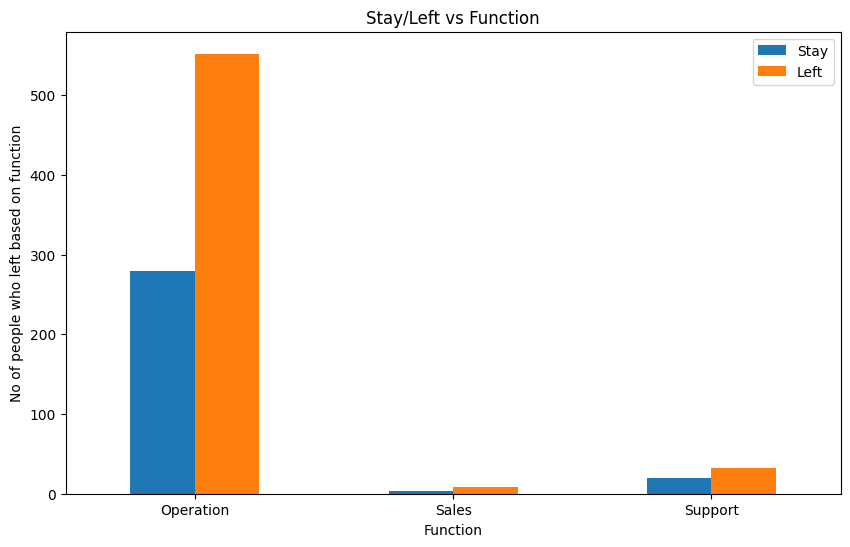

In [16]:
pd.crosstab(attrdata['Function'], attrdata['Stay/Left']).plot(kind='bar', figsize=(10,6))
plt.title("Stay/Left vs Function")
plt.xlabel("Function")
plt.ylabel("No of people who left based on function")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)

In [17]:
hire = attrdata['Hiring Source'].value_counts()
hire

,count
Hiring Source,
Direct,708
Agency,116
Employee Referral,71


In [18]:
marital_status = attrdata['Marital Status'].value_counts()
marital_status

,count
Marital Status,
Single,533
Marr.,356
Div.,2
NTBD,2
Sep.,2


In [19]:
emp_grp = attrdata['Emp. Group'].value_counts()
emp_grp['other group'] = 1
print(emp_grp)

Emp. Group
B1             537
B2             275
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: count, dtype: int64


In [20]:
job_role = attrdata['Job Role Match'].value_counts()
job_role

,count
Job Role Match,
Yes,480
No,415


<Axes: xlabel='Job Role Match'>

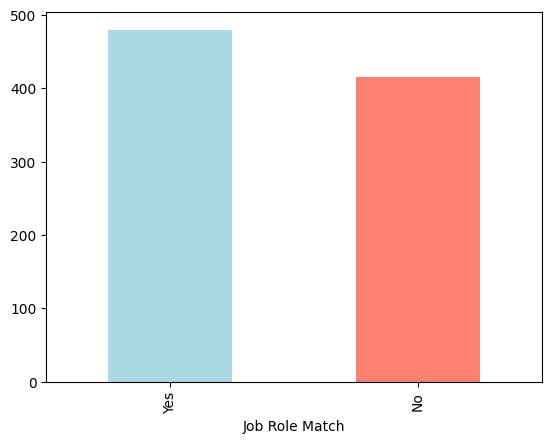

In [21]:
attrdata['Job Role Match'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

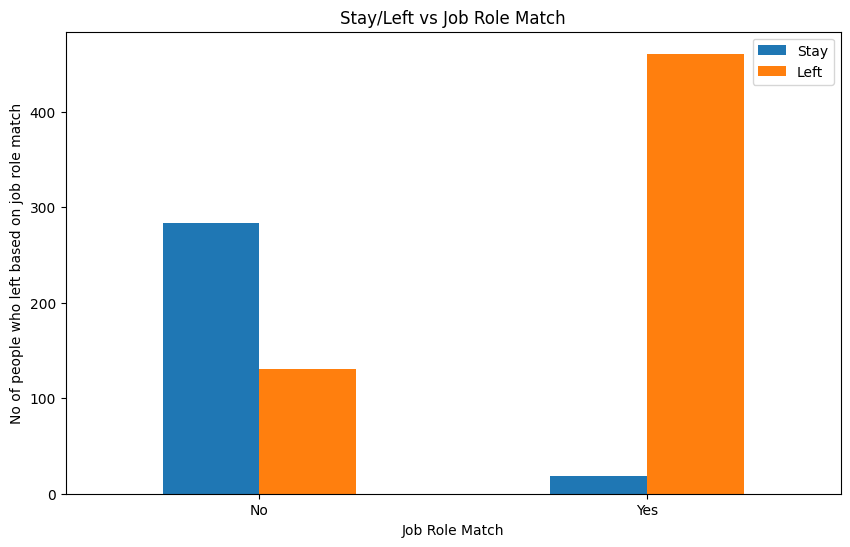

In [22]:
pd.crosstab(attrdata['Job Role Match'], attrdata['Stay/Left']).plot(kind ='bar', figsize=(10,6))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Job Role Match")
plt.ylabel("No of people who left based on job role match")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)

In [23]:
tenure_grp = attrdata['Tenure Grp.'].value_counts()
tenure_grp

,count
Tenure Grp.,
> 1 & < =3,626
< =1,269


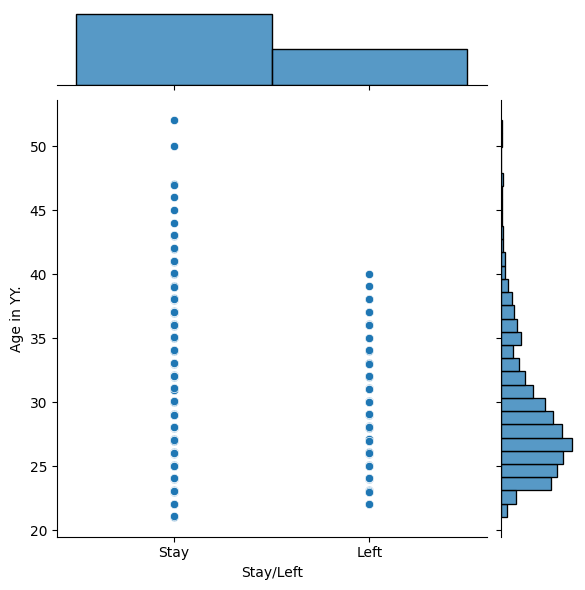

In [24]:
import seaborn as sns

sns.jointplot(x='Stay/Left', y='Age in YY.', data=attrdata)

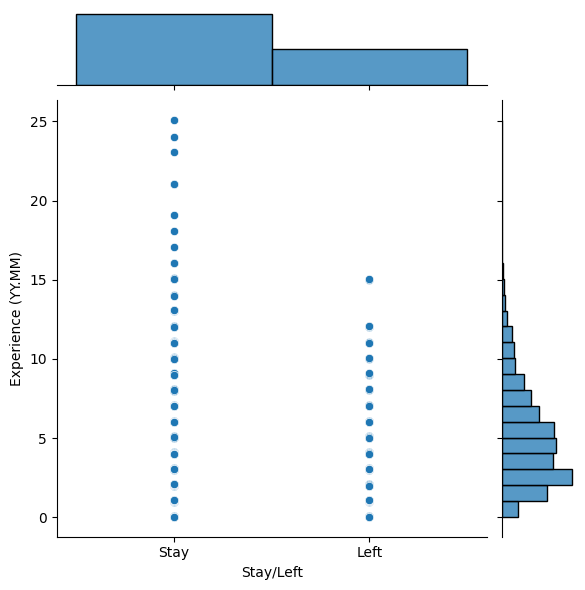

In [25]:
sns.jointplot(x='Stay/Left', y='Experience (YY.MM)', data=attrdata)

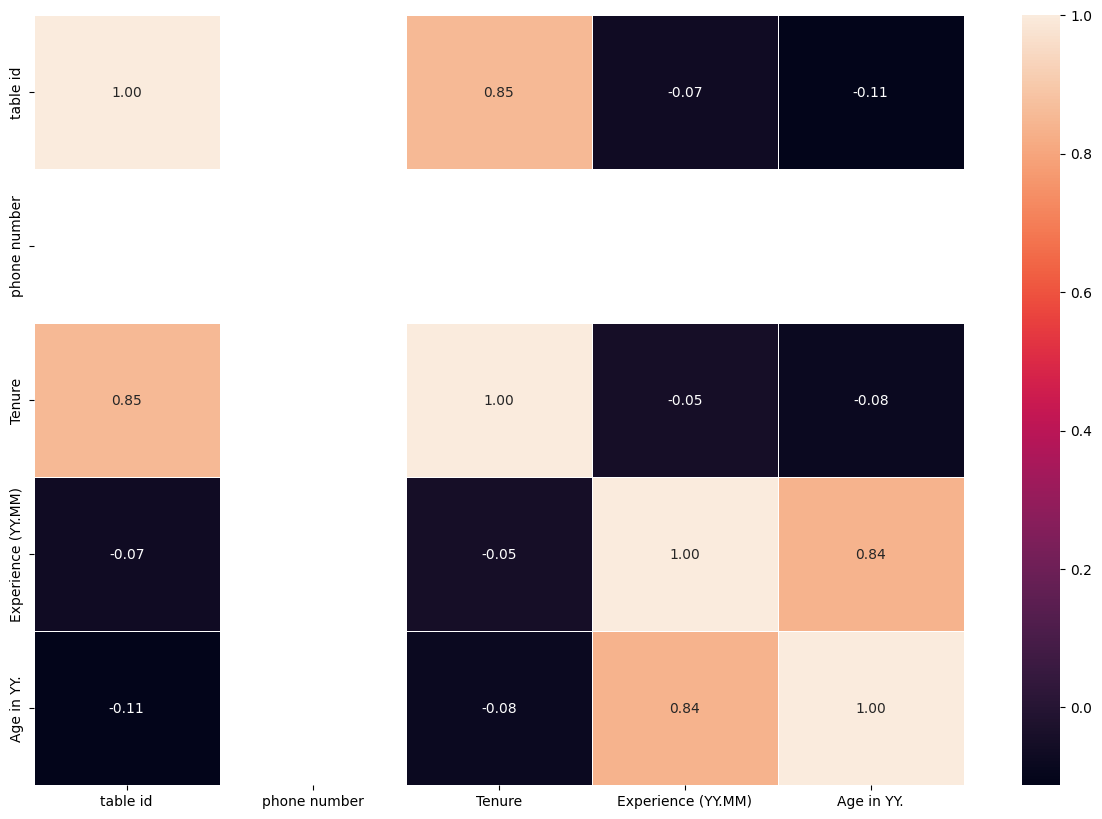

In [26]:
numeric_columns = attrdata.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")

In [27]:
attrdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               895 non-null    int64  
 1   name                   895 non-null    object 
 2   phone number           895 non-null    int64  
 3   Location               895 non-null    object 
 4   Emp. Group             895 non-null    object 
 5   Function               895 non-null    object 
 6   Gender                 895 non-null    object 
 7   Tenure                 895 non-null    float64
 8   Tenure Grp.            895 non-null    object 
 9   Experience (YY.MM)     895 non-null    float64
 10  Marital Status         895 non-null    object 
 11  Age in YY.             895 non-null    float64
 12  Hiring Source          895 non-null    object 
 13  Promoted/Non Promoted  895 non-null    object 
 14  Job Role Match         895 non-null    object 
 15  Stay/Left  

In [28]:
attrdata.head(5)

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay


**Data Cleaning**

In [29]:
location_dict = attrdata['Location'].value_counts()
print(location_dict)

location_dict_new = {
    'Orumieh':       7,
    'karaj':         6,
    'Tehran':     5,
    'Shiraz':     4,
    'Mashhad':          3,
    'Ahwaz':       2,
    'Maku':       1,
    'other place':   0,
}
print(location_dict_new)

Location
Orumieh     255
Karaj       236
Tehran      210
Shiraz       62
Mashhad      55
Ahwaz        29
Maku         20
Tabriz       14
Taleghan      6
Isfahan       4
Gorgan        3
Maragheh      1
Name: count, dtype: int64
{'Orumieh': 7, 'karaj': 6, 'Tehran': 5, 'Shiraz': 4, 'Mashhad': 3, 'Ahwaz': 2, 'Maku': 1, 'other place': 0}


In [30]:
attrdata['Location']

,Location
1,Karaj
2,Tehran
3,Karaj
4,Maku
5,Tehran
...,...
896,Taleghan
897,Taleghan
898,Taleghan
900,Taleghan


In [31]:
def location(x):
  if str(x) in location_dict_new.keys():
    return location_dict_new[str(x)]
  else:
    return location_dict_new['other place']

data_l = attrdata['Location'].apply(location)
attrdata['New Location'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,0
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,0
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5


In [32]:
gen = pd.get_dummies(attrdata['Function'])
gen.head()

,Operation,Sales,Support
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False


In [33]:
attrdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 901
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               895 non-null    int64  
 1   name                   895 non-null    object 
 2   phone number           895 non-null    int64  
 3   Location               895 non-null    object 
 4   Emp. Group             895 non-null    object 
 5   Function               895 non-null    object 
 6   Gender                 895 non-null    object 
 7   Tenure                 895 non-null    float64
 8   Tenure Grp.            895 non-null    object 
 9   Experience (YY.MM)     895 non-null    float64
 10  Marital Status         895 non-null    object 
 11  Age in YY.             895 non-null    float64
 12  Hiring Source          895 non-null    object 
 13  Promoted/Non Promoted  895 non-null    object 
 14  Job Role Match         895 non-null    object 
 15  Stay/Left  

In [34]:
hr= pd.get_dummies(attrdata['Hiring Source'])
hr.head()

,Agency,Direct,Employee Referral
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [35]:
marital_dict = pd.get_dummies (attrdata['Marital Status'])
marital_dict.head()

,Div.,Marr.,NTBD,Sep.,Single
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
5,False,True,False,False,False


In [36]:
marital_count =attrdata['Marital Status'].value_counts()

def Mar(x):
  if str(x) in marital_dict.keys() and marital_count[str(x)] > 100:
    return str(x)
  else:
    return 'Other status'

data_m = attrdata['Marital Status'].apply(Mar)
attrdata['New Marital Status'] = data_m
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital Status
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,0,Marr.
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,0,Marr.
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.


In [37]:
def Promoted(x):
  if x == 'Promoted':
    return 1
  else:
    return 0

data_p = attrdata['Promoted/Non Promoted'].apply(Promoted)
attrdata['New Promoted'] = data_p
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital Status,New Promoted
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,0,Marr.,1
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,0,Marr.,1
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.,1


In [38]:
Emp_dict_new = {
    'B1':4,
    'B2':3,
    'B3':2,
    'other group':1
}


In [39]:
def emp(x):
  if str(x) in Emp_dict_new.keys():
    return str(x)
  else:
    return 'other group'

data_e = attrdata['Emp. Group'].apply(emp)
attrdata['New Emp. Group'] = data_e

emp = pd.get_dummies(attrdata['New Emp. Group'])
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital Status,New Promoted,New Emp. Group
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,0,Marr.,1,other group
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,0,Marr.,1,B2
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.,1,B3


In [40]:
def job(x):
  if x =='Yes':
    return int(1)
  else:
    return int(0)

data_j = attrdata['Job Role Match'].apply(job)
attrdata['New Job Role Match'] = data_j
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital Status,New Promoted,New Emp. Group,New Job Role Match
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,Stay,0,Marr.,1,other group,0
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,Stay,0,Marr.,1,B2,1
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,...,39.09,Direct,Promoted,No,Stay,5,Marr.,1,B3,0


In [41]:
attrdata['Gender '].value_counts()

gender_dict = {
    'Female':0,
    'Male':1,
    'other':2
}

In [42]:
def Gen(x):
  if x in gender_dict.keys():
    return str(x)
  else:
    return 'other'

data_g = attrdata['Gender '].apply(Gen)
attrdata['New Gender'] = data_g
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital Status,New Promoted,New Emp. Group,New Job Role Match,New Gender
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,...,Direct,Promoted,No,Stay,0,Marr.,1,other group,0,Male
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,...,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,...,Direct,Promoted,Yes,Stay,0,Marr.,1,B2,1,Male
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,...,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,...,Direct,Promoted,No,Stay,5,Marr.,1,B3,0,Male


In [43]:
dummies_new_gender = pd.get_dummies(attrdata['New Gender'])
dummies_new_gender.head()


,Female,Male,other
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [44]:
tengrp = pd.get_dummies(attrdata['Tenure Grp.'])
tengrp.head()

,< =1,> 1 & < =3
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False


In [51]:
dataset = pd.concat([attrdata, hr, marital_dict, tengrp, dummies_new_gender, emp ], axis=1)
dataset.replace({True: 1, False: 0}, inplace=True)
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Single,< =1,> 1 & < =3,Female,Male,other,B1,B2,B3,other group
1,2,sid,9876544345,Karaj,B7,Support,Male,0.00,< =1,13.00,...,0,1,0,0,1,0,0,0,0,1
2,3,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,16.05,...,0,1,0,0,1,0,0,0,1,0
3,4,sid,9876544345,Karaj,B2,Operation,Male,0.01,< =1,6.06,...,0,1,0,0,1,0,0,1,0,0
4,5,sid,9876544345,Maku,B2,Operation,Male,0.00,< =1,7.00,...,0,1,0,0,1,0,0,1,0,0
5,6,sid,9876544345,Tehran,B3,Operation,Male,0.01,< =1,9.01,...,0,1,0,0,1,0,0,0,1,0


In [52]:
dataset.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left', 'New Location',
       'New Marital Status', 'New Promoted', 'New Emp. Group',
       'New Job Role Match', 'New Gender', 'Agency', 'Direct',
       'Employee Referral', 'Div.', 'Marr.', 'NTBD', 'Sep.', 'Single', '< =1',
       '> 1 & < =3', 'Female', 'Male', 'other', 'B1', 'B2', 'B3',
       'other group'],
      dtype='object')

In [56]:
#dataset.drop(["table id", "name", "Marital Status", "Promoted/Non Promoted", "Function", "Emp. Group", "Job Role Match", "Location", "Hiring Source", "Gender ", "Tenure", "New Gender", "New Marital Status", "New Emp. Group", "Tenure Grp."], axis=1, inplace=True)
dataset1 = dataset.drop([ "phone number"], axis=1)
dataset1.head()

,Experience (YY.MM),Age in YY.,Stay/Left,New Location,New Promoted,New Job Role Match,Agency,Direct,Employee Referral,Div.,...,Single,< =1,> 1 & < =3,Female,Male,other,B1,B2,B3,other group
1,13.00,38.08,Stay,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,16.05,36.04,Stay,5,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,6.06,32.07,Stay,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,7.00,32.05,Stay,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5,9.01,39.09,Stay,5,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [57]:
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'Stay/Left', 'New Location',
       'New Promoted', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Div.', 'Marr.', 'NTBD', 'Sep.', 'Single', '< =1',
       '> 1 & < =3', 'Female', 'Male', 'other', 'B1', 'B2', 'B3',
       'other group'],
      dtype='object')

In [58]:
corr_matix = dataset1.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matix, annot=True, linewidths=0.5, fmt=".2f")

ValueError: could not convert string to float: 'Stay'

In [59]:
dataset1['Stay/Left'].head()

,Stay/Left
1,Stay
2,Stay
3,Stay
4,Stay
5,Stay


In [60]:
dataset1.to_csv('cleaned_data.csv')

In [61]:
datasets = pd.read_csv('/content/cleaned_data.csv')
datasets = pd.DataFrame(datasets)
y = datasets["Stay/Left"]
X = dataset.drop(["Stay/Left"], axis=1)



# Splitting data - Train test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.head()

,phone number,Experience (YY.MM),Age in YY.,New Location,New Promoted,New Job Role Match,Agency,Direct,Employee Referral,Div.,...,Single,< =1,> 1 & < =3,Female,Male,other,B1,B2,B3,other group
688,9876544345,4.09,26.06,5,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
224,9876544345,2.08,26.00,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,0,0
480,9876544345,7.11,29.06,2,1,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
435,9876544345,3.00,25.02,0,1,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
872,9876544345,7.00,28.06,5,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


# Model Development

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier




In [64]:
lr = LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt = DecisionTreeClassifier()
rm = RandomForestClassifier()
svm = svm.SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()


In [65]:
for a,b in zip([lr,dt, knn, svm, rm, gnb], ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest", "Naive Bayes"]):
  a.fit(X_train, y_train)
  prediction = a.predict(X_train)
  y_pred = a.predict(X_test)
  score1 = accuracy_score(y_train, prediction)
  score = accuracy_score(y_test, y_pred)
  msg1 = "[%s] training data accuracy is : %f" % (b, score1)
  msg2 = "[%s] test data accuracy is : %f" % (b, score)
  print(msg1)
  print(msg2)

[Logistic Regression] training data accuracy is : 0.662011
[Logistic Regression] test data accuracy is : 0.659218
[Decision Tree] training data accuracy is : 0.998603
[Decision Tree] test data accuracy is : 0.871508
[KNN] training data accuracy is : 0.337989
[KNN] test data accuracy is : 0.340782
[SVM] training data accuracy is : 0.337989
[SVM] test data accuracy is : 0.340782
[Random Forest] training data accuracy is : 0.998603
[Random Forest] test data accuracy is : 0.871508
[Naive Bayes] training data accuracy is : 0.455307
[Naive Bayes] test data accuracy is : 0.418994


In [66]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.659217877094972,
 'KNN classifier': 0.3407821229050279,
 'Support Vector Machine': 0.3407821229050279,
 'Random forest': 0.8715083798882681,
 'Decision tree': 0.8715083798882681,
 'Naive Bayes': 0.41899441340782123}

In [67]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test, rm_y_preds))

              precision    recall  f1-score   support

        Left       0.83      0.79      0.81        61
        Stay       0.89      0.92      0.90       118

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



In [68]:
lr_y_preds = lr.predict(X_test)

print(classification_report(y_test, lr_y_preds))

              precision    recall  f1-score   support

        Left       0.00      0.00      0.00        61
        Stay       0.66      1.00      0.79       118

    accuracy                           0.66       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.43      0.66      0.52       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
model_compare = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.659218,0.340782,0.340782,0.871508,0.871508,0.418994


<Axes: >

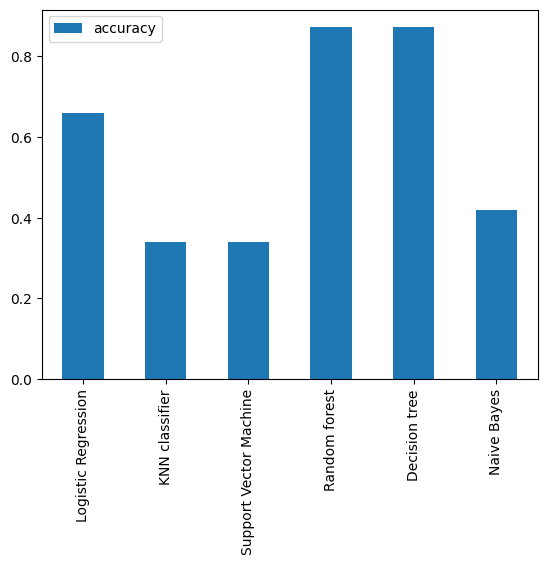

In [70]:
model_compare.T.plot(kind='bar')

In [71]:
feature_dict = dict(zip(dataset.columns, list(lr.coef_[0])))
feature_dict

{'phone number': 6.80672885842228e-11,
 'Experience (YY.MM)': 8.453173543845395e-20,
 'Age in YY.': 2.595741616141361e-19,
 'Stay/Left': 2.3143026316898683e-20,
 'New Location': -1.182165934851055e-21,
 'New Promoted': 2.4935408047799504e-20,
 'New Job Role Match': -1.0480067124180594e-21,
 'Agency': 5.391047916715344e-21,
 'Direct': 2.548770972770692e-21,
 'Employee Referral': 1.4414218722436953e-22,
 'Div.': 1.0522792310047834e-20,
 'Marr.': -4.061438653288835e-23,
 'NTBD': 7.207109361218476e-23,
 'Sep.': -3.806579027283533e-21,
 'Single': 1.156343467165791e-21,
 '< =1': 5.735468709902144e-21,
 '> 1 & < =3': 2.6670431063196976e-21,
 'Female': 4.2339267502018506e-21,
 'Male': -9.157679453591923e-24,
 'other': -2.1843842500011126e-21,
 'B1': 6.4330553330604805e-21,
 'B2': 1.75598894303666e-21,
 'B3': 8.871521509719216e-22}

In [73]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
      